<a href="https://colab.research.google.com/github/hsuancheyang/114-1-GenAI/blob/main/DNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

此程式碼區塊導入建立與訓練 MNIST 資料集神經網路模型所需的函式庫與模組：

* numpy：Python 科學運算的核心套件。
* matplotlib.pyplot：用於視覺化資料（圖像）的繪圖函式庫。
* keras.datasets.mnist：提供 MNIST 資料集存取功能，該資料集收錄大量手寫數字，常應用於圖像分類任務。
* keras.utils.to_categorical：實用函數，將類別向量（整數）轉換為二進位類別矩陣（one-hot 編碼）。
* keras.models.Sequential：Keras 模型類型，允許逐層建立神經網路。
* keras.layers：包含神經網路中使用的各類層，包括：
> * Dense：全連接層。
> * Flatten：將輸入重塑為扁平陣列。
> * Dropout：用於防止過擬合的正則化技術。
> * keras.optimizers.Adam：用於在訓練過程中更新神經網路權重的優化演算法。

In [2]:
def show_image(index):
    print(f'標籤: {y_train[index]}')
    plt.imshow(x_train[index], cmap='gray')
    plt.show()

這段程式碼定義了一個名為 show_image 的函式，它接受一個 index 作為輸入。

然後它會：

從 y_train 資料集中印出指定 index 的影像標籤。
使用 matplotlib 並以灰階色圖顯示 x_train 資料集中指定 index 的影像。
顯示該影像。


In [3]:
def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[start_id], cmap='binary')  # binary, gray
        title = f'Label={labels[start_id]}'
        # if len(predictions) > 0:
        #     title += f', Predict={predictions[start_id]}'
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        start_id += 1
    plt.show()

這段程式碼定義了一個名為 `show_images_labels_predictions` 的函式，用於顯示多個影像及其對應的標籤和預測結果（如果提供的話）。

這個函式會執行以下步驟：

1. 設定 matplotlib 圖形的大小。
2. 限制最多顯示 25 張影像，即使指定的 num 大於 25。
3. 使用迴圈顯示從 start_id 開始的指定數量的影像。
4. 對於每一張影像，建立一個子圖。
5. 在子圖中顯示影像，使用灰階色圖。
6. 設定子圖的標題，顯示影像的實際標籤。註解掉的程式碼顯示了如果提供了預測結果，也會將預測結果加到標題中。
7. 隱藏 x 軸和 y 軸的刻度標記。
8. 將 start_id 增加 1，以便處理下一張影像。
9. 顯示整個圖形。


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'訓練資料總筆數: {len(x_train)} 筆資料')
print(f'測試資料總筆數: {len(x_test)} 筆資料')

print(f'訓練資料的特徵維度: {x_train.shape}')
print(f'測試資料的特徵維度: {x_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
訓練資料總筆數: 60000 筆資料
測試資料總筆數: 10000 筆資料
訓練資料的特徵維度: (60000, 28, 28)
測試資料的特徵維度: (10000, 28, 28)


這段程式碼載入 MNIST 資料集，這是一個常用的手寫數字影像資料集。

程式碼執行以下步驟：

1. 使用 `nist.load_data()` 載入資料集，並將其分成訓練集 (`x_train`, `y_train`) 和測試集 (`x_test`, `y_test`)。
印出訓練資料和測試資料的總筆數。
印出訓練資料和測試資料的特徵維度 (`shape`)，這表示每個影像的大小（28x28 像素）。

In [5]:
# for i in range(9):
#     show_image(i)

# show_images_labels_predictions(train_features, train_labels, [], 0, 25)

In [6]:
# Features 預處理：將資料轉為 float32，並正規化，保持2D圖片格式
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255

print(f'訓練資料的特徵維度: {x_train.shape}')
print(f'測試資料的特徵維度: {x_test.shape}')

訓練資料的特徵維度: (60000, 28, 28, 1)
測試資料的特徵維度: (10000, 28, 28, 1)


這段程式碼對影像資料進行預處理，以便用於訓練神經網路模型。

程式碼執行以下步驟：

1. Features 預處理：
* 將 `x_train` 和 `x_test` 這兩個包含影像資料的 NumPy 陣列重塑（reshape）。原始的影像維度是 (圖片數量, 高度, 寬度)，在這裡被重塑為 (圖片數量, 高度, 寬度, 1)。最後一個維度 1 表示這是灰階影像（只有一個顏色通道）。
* 將資料類型轉換為 `float32`，這是神經網路常用的資料類型。
* 將像素值正規化，將其範圍從 0-255 縮放到 0-1 之間。這是透過將每個像素值除以 255 來實現的。正規化有助於提高模型的訓練效率和性能。
2. 印出經過預處理後 `x_train` 和 `x_test` 的新的特徵維度 (`shape`)。您會看到維度現在包含了顏色通道。

In [7]:
# Labels 預處理：將標籤轉為 one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f'訓練資料的標籤維度: {y_train[0:9]}')
print(f'測試資料的標籤維度: {y_test[0:9]}')

訓練資料的標籤維度: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
測試資料的標籤維度: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


這段程式碼對標籤資料進行了預處理，以便用於訓練神經網路模型：

* Labels 預處理：
> * 使用 `to_categorical(y_train, 10)` 將訓練資料的標籤 (`y_train`) 轉換為 One-Hot 編碼。原始標籤是單個數字（0-9），One-Hot 編碼會將其轉換為一個長度為 10 的向量，其中只有對應類別的索引位置是 1，其他位置都是 0。例如，數字 5 會被轉換為 `[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]`。
> * 同樣地，使用 `to_categorical(y_test, 10)` 將測試資料的標籤 (y_test) 轉換為 One-Hot 編碼。這裡的 10 表示總共有 `10` 個類別（從 0 到 9）。
* 印出經過預處理後 y_train 和 y_test 的前 9 個標籤的維度，以展示 One-Hot 編碼的結果。

In [8]:
# 建立DNN模型
model = Sequential()

# 展平層
model.add(Flatten(input_shape=(28, 28, 1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# 全連接層
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 防止過擬合
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 輸出層

這段程式碼是建立一個深度神經網路 (DNN) 模型：

* model = Sequential(): 初始化一個 Sequential 模型，這是一個線性堆疊的模型，層與層之間依序連接。
* model.add(Flatten(input_shape=(28, 28, 1))): 加入一個展平層 (Flatten)。
Flatten 層的作用是將輸入的影像資料從多維陣列（例如 28x28 像素的影像，加上一個顏色通道）轉換成一維的向量。
* input_shape=(28, 28, 1) 指定了輸入資料的形狀。即使 Keras 1.x 之後通常不直接在層中指定 input_shape，但這行程式碼的目的是將每個 28x28 像素的灰階影像（通道數為 1）展平為一個長度為 28 * 28 * 1 = 784 的向量。

雖然在程式碼中看到了關於 input_shape 的警告，這通常是提示在新的 Keras 版本中，建議使用 Input 層作為 Sequential 模型的第一層來指定輸入形狀。然而，在這個簡單的案例中，直接在第一個層中指定 input_shape 仍然是有效的，並且模型可以正常運作。

之後再依序加入各個全連階層和dorpout層：
1. model.add(Dense(128, activation='relu')): 加入第一個全連接層 (Dense)。
* Dense 層是神經網路中最基本的層之一，每個神經元都與前一層的所有神經元連接。
* 128 指定了這一層的神經元數量。
* activation='relu' 指定了使用 ReLU (Rectified Linear Unit) 激活函數。ReLU 是一種常用的激活函數，它將所有負值設定為零，而正值保持不變，有助於引入非線性並加速訓練。
2. model.add(Dropout(0.5)): 加入一個 Dropout 層。
* Dropout 是一種正則化技術，用於防止模型過擬合。在訓練過程中，它會隨機地將這一層中 50% (0.5) 的神經元輸出設定為零。這會迫使網路學習更具魯棒性的特徵，因為它不能依賴於任何單個神經元。
3. model.add(Dense(64, activation='relu')): 加入第二個全連接層，包含 64 個神經元，同樣使用 ReLU 激活函數。
4. model.add(Dropout(0.5)): 加入第二個 Dropout 層，同樣以 50% 的機率隨機關閉神經元。
5. model.add(Dense(10, activation='softmax')): 加入輸出層。
這是一個全連接層，包含 10 個神經元，因為 MNIST 資料集有 10 個類別（數字 0 到 9）。
activation='softmax' 指定了使用 Softmax 激活函數。Softmax 函數會將輸出轉換為一個機率分佈，每個神經元的輸出代表輸入影像屬於對應類別的機率。所有輸出的機率加總為 1。

這些層共同構成了您用於 MNIST 影像分類的深度神經網路模型的主體。


In [10]:
# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

這段程式碼是用來編譯您建立的神經網路模型：

* model.compile(...): 這個方法用於配置模型的學習過程。
> * optimizer=Adam(learning_rate=0.001): 指定使用 Adam 優化器來更新模型的權重。
> * learning_rate=0.001 設定了學習率，控制每次權重更新的幅度。Adam 是一種常用的優化算法，通常在許多任務中表現良好。
> * loss='categorical_crossentropy': 指定使用分類交叉熵作為損失函數。這個損失函數常用於多類別分類問題，特別是當標籤經過 One-Hot 編碼時。它衡量模型的預測機率分佈與實際標籤之間的差異。
> * metrics=['accuracy']: 指定在訓練和評估過程中需要監控的指標。這裡設定為 accuracy，表示模型在分類任務上的準確度。

編譯模型是訓練前的必要步驟，它會根據指定的優化器、損失函數和指標來配置模型，使其準備好進行訓練。

In [11]:
# 訓練模型
train_history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,  # 使用10%的訓練資料作為驗證集
    verbose=1)

model.summary()

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5898 - loss: 1.2325 - val_accuracy: 0.9433 - val_loss: 0.1976
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8815 - loss: 0.4166 - val_accuracy: 0.9570 - val_loss: 0.1505
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9095 - loss: 0.3296 - val_accuracy: 0.9648 - val_loss: 0.1245
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9240 - loss: 0.2729 - val_accuracy: 0.9677 - val_loss: 0.1100
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9312 - loss: 0.2454 - val_accuracy: 0.9717 - val_loss: 0.1014
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9352 - loss: 0.2350 - val_accuracy: 0.9715 - val_loss: 0.0961
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9383 - loss: 0.2152 - val_accuracy: 0.9735 - val_loss: 0.0969
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9425 - loss: 0.2084 - val_accuracy:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

這段程式碼是用於訓練您之前建立和編譯的神經網路模型：

* train_history = model.fit(...): 這個方法用於訓練模型。
> * x_train: 訓練資料的特徵（影像）。
> * y_train: 訓練資料的標籤（One-Hot 編碼）。
> * batch_size=128: 指定每個訓練批次的樣本數量。每個批次包含 128 個影像，模型會使用這些影像來計算梯度並更新權重。
> * epochs=10: 指定訓練的輪數。每一輪 (epoch) 表示模型會完整地遍歷整個訓練資料集一次。
> * validation_split=0.1: 從訓練資料中劃分出 10% 的資料作為驗證集。在每個 epoch 結束時，模型會使用驗證集來評估性能，這有助於監控模型是否過擬合。
> * verbose=1: 設定訓練過程的詳細程度。1 表示會顯示訓練進度條和每個 epoch 的結果（損失和準確度）。
* model.summary(): 顯示模型的結構摘要，包括每一層的名稱、輸出形狀和參數數量。這有助於了解模型的架構。

訓練過程中，您會看到每個 epoch 的訓練損失 (loss) 和準確度 (accuracy)，以及在驗證集上的驗證損失 (val_loss) 和驗證準確度 (val_accuracy)。這些指標可以幫助您評估模型的訓練情況。

In [12]:
# 評估模型
loss, acc = model.evaluate(x_test, y_test)
print(f'測試資料的準確率 = {acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9652 - loss: 0.1174
測試資料的準確率 = 96.91%


這段程式碼是用來評估您訓練好的模型在測試資料集上的效能：

* loss, acc = model.evaluate(x_test, y_test): 這個方法會使用測試資料 (x_test, y_test) 來評估模型的性能。
> * 它會計算模型在測試集上的損失值 (loss) 和準確度 (acc)。
* print(f'測試資料的準確率 = {acc*100:.2f}%'): 印出模型在測試資料集上的準確度，並格式化為百分比，保留兩位小數。

這個步驟可以讓您了解訓練好的模型在未曾見過的資料上的表現如何。

In [13]:
print("\n進行預測...")
predictions = model.predict(x_test[:20], verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:20], axis=1)

print("前10個測試樣本的預測結果:")
for i in range(20):
    print(f"樣本 {i+1}: 實際={actual_classes[i]}, 預測={predicted_classes[i]}, 正確={'✓' if actual_classes[i] == predicted_classes[i] else '✗'}")


進行預測...
前10個測試樣本的預測結果:
樣本 1: 實際=7, 預測=7, 正確=✓
樣本 2: 實際=2, 預測=2, 正確=✓
樣本 3: 實際=1, 預測=1, 正確=✓
樣本 4: 實際=0, 預測=0, 正確=✓
樣本 5: 實際=4, 預測=4, 正確=✓
樣本 6: 實際=1, 預測=1, 正確=✓
樣本 7: 實際=4, 預測=4, 正確=✓
樣本 8: 實際=9, 預測=9, 正確=✓
樣本 9: 實際=5, 預測=5, 正確=✓
樣本 10: 實際=9, 預測=9, 正確=✓
樣本 11: 實際=0, 預測=0, 正確=✓
樣本 12: 實際=6, 預測=6, 正確=✓
樣本 13: 實際=9, 預測=9, 正確=✓
樣本 14: 實際=0, 預測=0, 正確=✓
樣本 15: 實際=1, 預測=1, 正確=✓
樣本 16: 實際=5, 預測=5, 正確=✓
樣本 17: 實際=9, 預測=9, 正確=✓
樣本 18: 實際=7, 預測=7, 正確=✓
樣本 19: 實際=3, 預測=3, 正確=✓
樣本 20: 實際=4, 預測=4, 正確=✓


這段程式碼是用於使用訓練好的模型進行預測，並顯示部分預測結果：

1. print("\n進行預測..."): 印出一行文字表示正在進行預測。
2. predictions = model.predict(x_test[:20], verbose=0): 使用 model.predict() 方法對 x_test 的前 20 個樣本進行預測。verbose=0 表示在預測過程中不安靜地執行，不顯示進度條。
3. predicted_classes = np.argmax(predictions, axis=1): 對預測結果 (predictions) 進行處理。由於模型的輸出是 One-Hot 編碼的機率分佈，np.argmax 會找出每個預測結果中機率最高的索引，這個索引就是模型預測的數字類別。axis=1 表示在每個樣本的預測結果上進行操作。
4. actual_classes = np.argmax(y_test[:20], axis=1): 對實際標籤 (y_test) 的前 20 個樣本進行處理。同樣使用 np.argmax 將 One-Hot 編碼的實際標籤轉換回數字類別。
5. print("前10個測試樣本的預測結果:"): 印出一行文字表示即將顯示預測結果。
6. 使用 for 迴圈遍歷前 20 個樣本：
print(f"樣本 {i+1}: 實際={actual_classes[i]}, 預測={predicted_classes[i]}, 正確={'✓' if actual_classes[i] == predicted_classes[i] else '✗'}"): 印出每個樣本的實際類別、預測類別，並使用 '✓' 或 '✗' 表示預測是否正確。

這段程式碼讓您可以快速查看模型在前 20 個測試樣本上的預測表現。



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


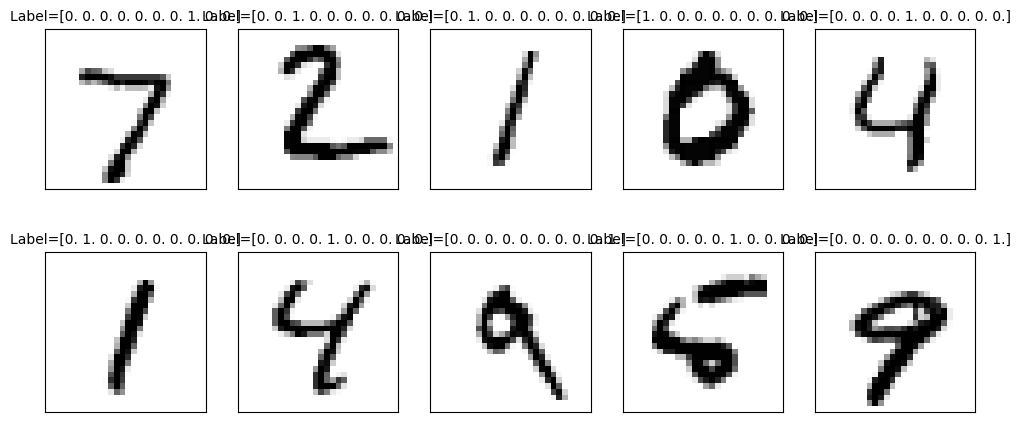

In [14]:
prediction = model.predict(x_test)
show_images_labels_predictions(x_test, y_test, prediction, 0)